In [1]:
import sys
from pathlib import Path
import numpy as np
sys.path.append('..')  # Add parent directory to path
from experiments.compare_avg_perplexities import (process_datasets, 
                                                  print_and_save_results, 
                                                  create_perplexity_visualization)
from tqdm.auto import tqdm

In [2]:
directories = ["../results/mao", 
               "../results/chinese_novels"]
    
# Process all datasets with minimal output for notebook use
epoch_results, all_epochs = process_datasets(
    directories=directories,
    sequence_length=16,
    sample_size=1000,
    num_trials=10,
    seed=42,
    verbose=False  # Minimal output for notebook use
)

Configuration: 10 trials with 1000 sequences per trial

Processing 2 datasets...

=== Processing dataset: mao ===
Found 6 epochs: [-1, 0, 1, 2, 3, 4]
Loading 6 epoch files...
✓ Loaded 6 epoch files
Extracting 16-character sequences from 2476 chunks...
✓ Found 1139574 valid sequences in 2066/2476 chunks
Using all 1139574 sequences for 10 trials
Running 10 trials with 1000 sequences each...
  Epoch -1: 13.908 ± 0.371 (10 trials)
Running 10 trials with 1000 sequences each...
  Epoch 0: 9.663 ± 0.217 (10 trials)
Running 10 trials with 1000 sequences each...
  Epoch 1: 8.175 ± 0.176 (10 trials)
Running 10 trials with 1000 sequences each...
  Epoch 3: 6.751 ± 0.140 (10 trials)
Running 10 trials with 1000 sequences each...
  Epoch 2: 7.268 ± 0.156 (10 trials)
Running 10 trials with 1000 sequences each...
  Epoch 4: 6.553 ± 0.132 (10 trials)
✓ Completed mao (memory cleaned)

=== Processing dataset: chinese_novels ===
Found 6 epochs: [-1, 0, 1, 2, 3, 4]
Loading 6 epoch files...
✓ Loaded 6 epoch

In [3]:
print_and_save_results(
        epoch_results=epoch_results,
        all_epochs=all_epochs,
        sequence_length=16,
        sample_size=100
    )


PERPLEXITY COMPARISON - 16-CHARACTER SEQUENCES
Sample size: 100 sequences per dataset

Epoch   chinese_novels           mao                      
----------------------------------------------------------
-1       56.47± 1.57 (n=1000  )   13.91± 0.37 (n=1000  )  
0        59.94± 1.65 (n=1000  )    9.66± 0.22 (n=1000  )  
1        62.70± 1.74 (n=1000  )    8.18± 0.18 (n=1000  )  
2        64.91± 1.82 (n=1000  )    7.27± 0.16 (n=1000  )  
3        68.38± 1.91 (n=1000  )    6.75± 0.14 (n=1000  )  
4        70.35± 1.96 (n=1000  )    6.55± 0.13 (n=1000  )  

SUMMARY STATISTICS

Dataset: chinese_novels
------------------------------
Epochs analyzed: 6
Average perplexity across epochs: 63.789 ± 4.742
Min perplexity: 56.465 (epoch -1)
Max perplexity: 70.345 (epoch 4)
Total sequences analyzed: 6,000
Chunk utilization: 50628/50718 (99.8%)

Dataset: mao
------------------------------
Epochs analyzed: 6
Average perplexity across epochs: 8.720 ± 2.542
Min perplexity: 6.553 (epoch 4)
Max perplexity

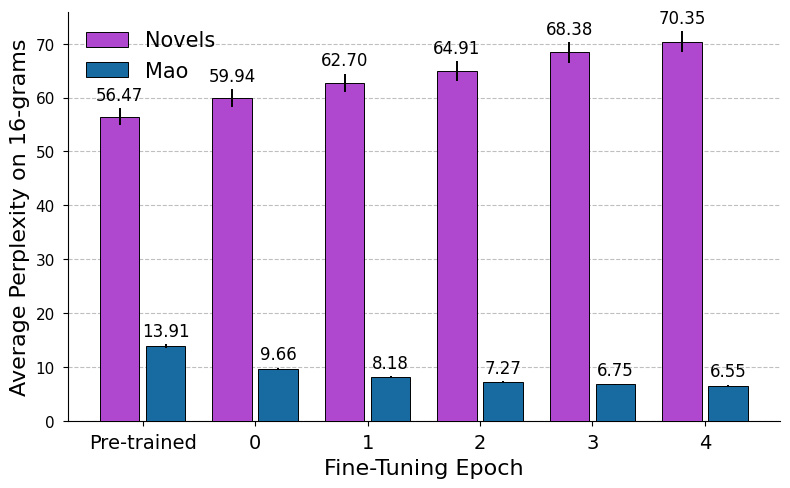

In [3]:
create_perplexity_visualization(epoch_results, all_epochs, 16, {"mao": "Mao", "chinese_novels": "Novels"})

In [4]:
epoch_results

defaultdict(dict,
            {-1: {'mao': {'mean_perplexity': 13.907584574486986,
               'std_perplexity': 0.3707190875934257,
               'num_sequences': 1000,
               'num_trials': 10,
               'num_chunks': 2476,
               'valid_chunks': 2066},
              'chinese_novels': {'mean_perplexity': 56.465259967091264,
               'std_perplexity': 1.5733006028515684,
               'num_sequences': 1000,
               'num_trials': 10,
               'num_chunks': 8453,
               'valid_chunks': 8438}},
             0: {'mao': {'mean_perplexity': 9.662652105057186,
               'std_perplexity': 0.21705192285159877,
               'num_sequences': 1000,
               'num_trials': 10,
               'num_chunks': 2476,
               'valid_chunks': 2066},
              'chinese_novels': {'mean_perplexity': 59.94334722646628,
               'std_perplexity': 1.6491584190537147,
               'num_sequences': 1000,
               'num_trials'

In [ ]:
from experiments.calculate_document_loss import calculate_corpus_loss

all_epochs = [-1, 0, 1, 2, 3, 4]

datasets = {'chinese_novels': '../datasets/chunked/C_chunked_chinese_novels.json',
            'mao': '../datasets/chunked/C_chunked_mao.json'}

sample_size = 1000
max_length = 1024
perplexities = {epoch: {"mao": {}, "chinese_novels": {}} for epoch in epochs}
print(perplexities)
print(perplexities[-1])
for dataset_name, data_file in datasets.items():
    for epoch in epochs:
        model_path = f"../models/model_epoch_{str(epoch)}"
        tokenizer_path = "../tokenizers/fineweb_char_tokenizer"
        mean_loss = calculate_corpus_loss(
                model_path=model_path,
                tokenizer_path=tokenizer_path,
                data_file=data_file,
                max_length=max_length,
                sample_size=sample_size
                )
        print(f"Epoch {epoch} - Dataset {dataset_name} - Mean loss: {mean_loss}")
        perplexities[epoch][dataset_name]['mean_perplexity'] = np.exp(mean_loss)

INFO:experiments.calculate_document_loss:Using device: cuda
INFO:experiments.calculate_document_loss:Loading model from ../models/model_epoch_-1


{-1: {'mao': {}, 'chinese_novels': {}}, 0: {'mao': {}, 'chinese_novels': {}}, 1: {'mao': {}, 'chinese_novels': {}}, 2: {'mao': {}, 'chinese_novels': {}}, 3: {'mao': {}, 'chinese_novels': {}}, 4: {'mao': {}, 'chinese_novels': {}}}
{'mao': {}, 'chinese_novels': {}}


INFO:experiments.calculate_document_loss:Loading tokenizer from ../tokenizers/fineweb_char_tokenizer
INFO:experiments.calculate_document_loss:Loading data from ../datasets/chunked/C_chunked_chinese_novels.json
INFO:experiments.calculate_document_loss:Loaded 8453 texts
INFO:experiments.calculate_document_loss:Sampled 1000 documents
INFO:experiments.calculate_document_loss:Calculating losses...


Processing documents:   0%|          | 0/1000 [00:00<?, ?it/s]

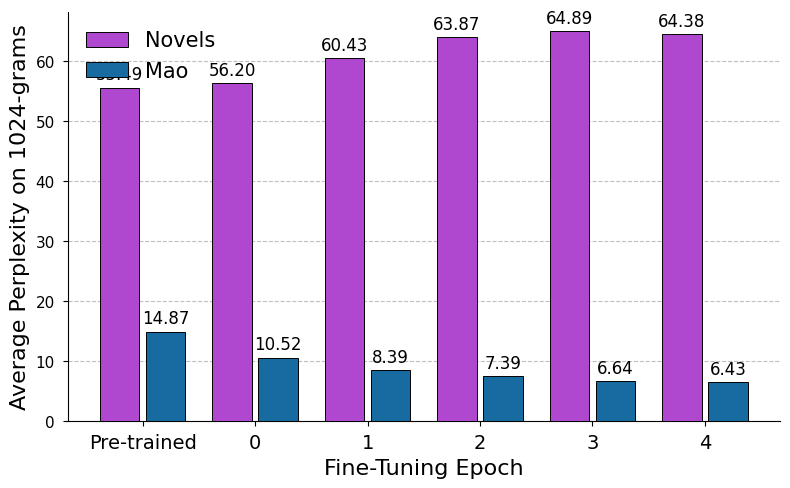

In [15]:
create_perplexity_visualization(perplexities, all_epochs, 1024, {"mao": "Mao", "chinese_novels": "Novels"})